<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-environment" data-toc-modified-id="Creating-the-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the environment</a></span><ul class="toc-item"><li><span><a href="#Installing-libraries" data-toc-modified-id="Installing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing libraries</a></span></li><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Checking-system-and-setting-it-up" data-toc-modified-id="Checking-system-and-setting-it-up-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking system and setting it up</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Data-exploration-shortcut" data-toc-modified-id="Data-exploration-shortcut-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data exploration shortcut</a></span></li><li><span><a href="#Exploring-independent-variables" data-toc-modified-id="Exploring-independent-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring independent variables</a></span></li></ul></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li></ul></div>

# Creating the environment 

## Installing libraries

In [1]:
# Installing modules
# !pip install plotly

## Importing modules

In [2]:

# Importing libraries
print("Importing libraries ... ")
import pandas as pd
import numpy as np
import pixiedust
import seaborn as sns
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
print("All modules are ready")




Importing libraries ... 
Pixiedust database opened successfully


All modules are ready


## Checking system and setting it up

In [3]:
# Setting up the system

def settings():
    # Display python version and operational system-specif parameters 
    import sys
    print("Python version: ", sys.version, "\n")

    # Check the number of cores and memory usage
    import multiprocessing as mp
    num_cores = mp.cpu_count()
    import psutil
    print("This kernel has ", num_cores, "cores and memory usage of:", psutil.virtual_memory(), "\n")

    # # Check Dask and Hosting the diagnostics dashboard
    # cluster = LocalCluster()
    # client = Client(cluster)
    # client

    # Expands the visualization of a matrix
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.width', 500)
    
    #Checking the directory we are working on
    import os
    print("File directory", os.getcwd())

settings()

Python version:  3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)] 

This kernel has  4 cores and memory usage of: svmem(total=8589934592, available=3456798720, percent=59.8, used=4217245696, free=642818048, active=2825433088, inactive=2637000704, wired=1391812608) 

File directory /Users/speedy/Desktop/UofT/Course load/INF2179H - Machine Learning/Notebooks


# Data exploration

In [7]:
# reading dataset
siri = pd.read_csv("Data/SiriLog.csv")

# printing the first two lines on the dataset
siri.head(2)

The data shape is:  (1048575, 12)


,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0


In [11]:
# Exploration 1st step
def exploration():
    # Dataset type
    print("Dataset type is: ", type(siri), "\n")
    
    # Data shape
    print("The data shape is: ", siri.shape, "\n")
    
    # Checking for duplicates
    dup = siri.duplicated().sum()
    print("This dataset has ", dup, "duplicated values\n")
    
    # Column names
    print("Column names are: ", siri.columns)
    

exploration()

Dataset type is:  <class 'pandas.core.frame.DataFrame'> 

The data shape is:  (1048575, 12) 

This dataset has  0 duplicated values

Column names are:  Index(['Time', 'LineID', 'JourneyPattern', 'VehicleJID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay', 'VehicleID', 'StopID', 'AtStop'], dtype='object')


In [13]:
# Checking null values
siri.isnull().sum()

Time              0
LineID            0
JourneyPattern    0
VehicleJID        0
Operator          0
Congestion        0
Lon               0
Lat               0
Delay             0
VehicleID         0
StopID            0
AtStop            0
dtype: int64

In [17]:
siri.dtypes

Time                int64
LineID             object
JourneyPattern     object
VehicleJID          int64
Operator           object
Congestion          int64
Lon               float64
Lat               float64
Delay               int64
VehicleID           int64
StopID              int64
AtStop              int64
dtype: object

Most of the initial exploration can be done simply by using the dataframe.info() command

## Data exploration shortcut

In [18]:
siri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1048575 non-null  int64  
 1   LineID          1048575 non-null  object 
 2   JourneyPattern  1048575 non-null  object 
 3   VehicleJID      1048575 non-null  int64  
 4   Operator        1048575 non-null  object 
 5   Congestion      1048575 non-null  int64  
 6   Lon             1048575 non-null  float64
 7   Lat             1048575 non-null  float64
 8   Delay           1048575 non-null  int64  
 9   VehicleID       1048575 non-null  int64  
 10  StopID          1048575 non-null  int64  
 11  AtStop          1048575 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 96.0+ MB


In [14]:
# Printing summary statistics
siri.describe()

,Time,VehicleJID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.411733e+09,9.977111e+03,6.713874e-03,-6.270000e+00,5.334311e+01,1.513641e+02,3.659187e+04,2.472550e+03,2.197182e-01
std,1.397623e+04,7.739258e+04,8.166274e-02,7.979334e-02,5.285900e-02,6.200250e+02,4.065003e+03,2.065485e+03,4.140559e-01
min,1.411686e+09,1.000000e+00,0.000000e+00,-6.614652e+00,5.307042e+01,-1.420900e+04,1.800100e+04,0.000000e+00,0.000000e+00
25%,1.411720e+09,1.994000e+03,0.000000e+00,-6.304491e+00,5.332053e+01,-5.900000e+01,3.339600e+04,7.900000e+02,0.000000e+00
50%,1.411733e+09,3.687000e+03,0.000000e+00,-6.261588e+00,5.334552e+01,6.400000e+01,3.361600e+04,1.934000e+03,0.000000e+00
75%,1.411745e+09,5.304000e+03,0.000000e+00,-6.233367e+00,5.336943e+01,2.950000e+02,4.002000e+04,3.905000e+03,0.000000e+00
max,1.411756e+09,9.969440e+05,1.000000e+00,-6.053133e+00,5.360652e+01,1.172300e+04,4.403400e+04,7.572000e+03,1.000000e+00


## Exploring independent variables

In [15]:
siri.Operator.unique()

array(['RD', 'HN', 'D1', 'CD', 'PO', 'SL', 'CF', 'D2'], dtype=object)

In [16]:
# Checking unique Operator and how many times they appear in the dataset
siri["Operator"].value_counts()

HN    187732
PO    185149
D1    138919
RD    128832
SL    118097
CD    108482
D2     99400
CF     81964
Name: Operator, dtype: int64

# Correlation Analysis

1. We see an expected positive strong correlation between Operator, Delay, Congestion and VehicleJID,
2. A mild correlation between JourneyPattern and Delay
3. A weak correlation between:
    3.1. Time and Congestion; 
    3.2. VehicleJID, Lat and Lon;  
    3.3. Lon and time; and
4. No Negative correlation is presented in the original dataset.

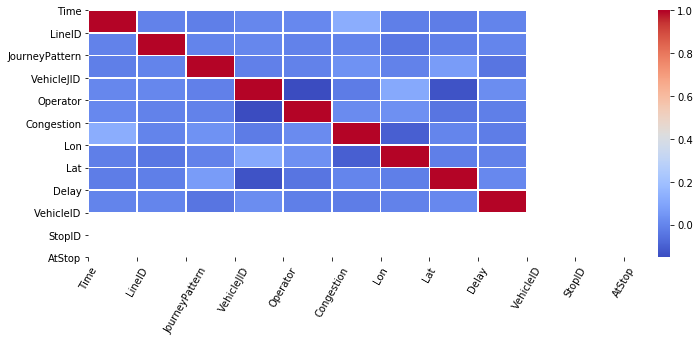

In [20]:
dtset = siri
correlation = siri.corr() # data correlation 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(212)
sns.heatmap(correlation, ax=ax, cmap="coolwarm", linewidths = 0.5)
# fig.colorbar(cax)
ticks = np.arange(0,len(siri.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=60)
ax.set_yticks(ticks)
ax.set_xticklabels(siri.columns)
ax.set_yticklabels(siri.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf1319f790>,
      dtype=object)

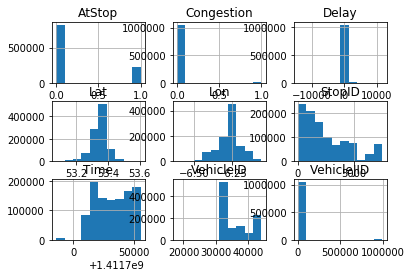

In [24]:
# dat_ = pd.read_csv("merged_obs.csv", parse_dates=True, squeeze=True, index_col=1).drop(["Unnamed: 0"], axis=1)
# da = dat_.iloc[:8960, :] # 3 yrs data
# plt.figure(figsize=(20, 20))
siri.hist()
# plt.show()

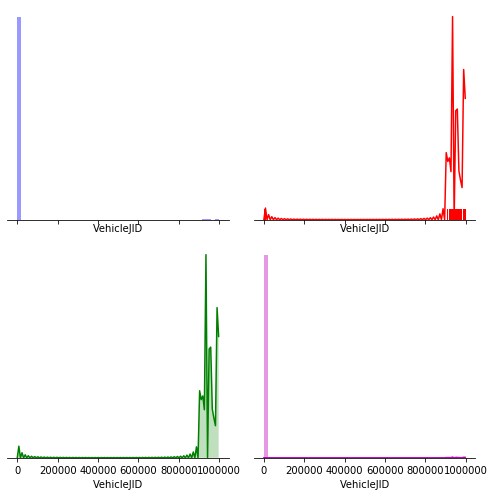

In [27]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(siri.iloc[:, 3], kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(siri.iloc[:, 3], hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(siri.iloc[:, 3], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(siri.iloc[:, 3], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

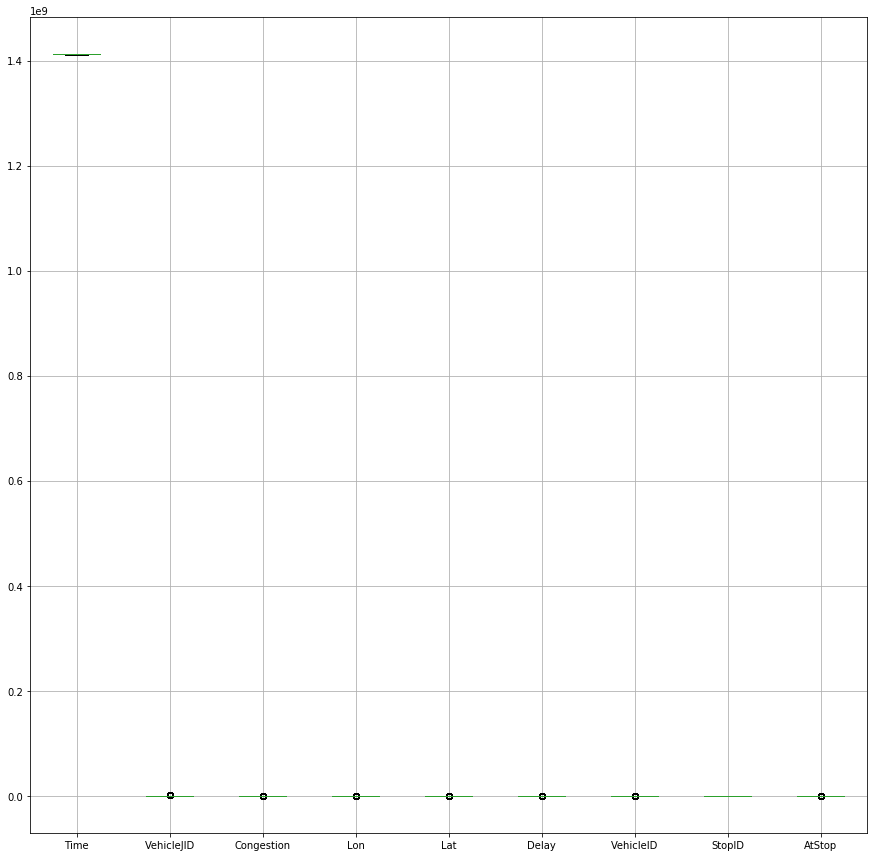

In [31]:
# from sklearn.preprocessing import StandardScaler
# stdsca = StandardScaler()
# s_ = stdsca.fit_transform(siri)
plt.figure(figsize=(15, 15))
pd.DataFrame(siri).boxplot()
plt.show()

TypeError: set_xlabel() missing 1 required positional argument: 'xlabel'

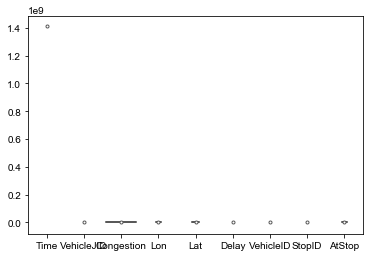

In [32]:
ax = sns.violinplot(data=siri, palette="Set2")
sns.set(rc={'figure.figsize':(15,15)})
ax.set_xlabel(fontsize=20)
ax.set_ylabel(fontsize=20)